# Identifying important features with decision trees

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from dtreeviz.trees import dtreeviz

In [2]:
filepath = '../../data_20210213_1406_____USE_THIS_latest_version/train_20210213_1406_NAmean.csv'
housing_df = pd.read_csv(filepath)
housing_df.set_index('Id')
pd.set_option('display.max_columns', None)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 196 entries, Unnamed: 0 to MiscFeature_nan
dtypes: float64(4), int64(192)
memory usage: 2.2 MB


In [3]:
df = housing_df[housing_df.columns.difference(['Unnamed: 0', 'Id'])]
df_X = df[df.columns.difference(['SalePrice'])]
s_y = df['SalePrice']
df_X.head()
# X = df_X.to_numpy()
# y = s_y.to_numpy()
# print('X shape:', X.shape)
# print('y shape:', y.shape)

0      0             3              1   
2       920       866          0      0             3              1   
3       961       756          0      0             3              1   
4      1145      1053          0      0             4              1   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   BldgType_nan  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtFinType1  \
0             0         2             0         706           0             6   
1             0         2             3         978           0             5   
2             0         2             1         486           0             6   
3             0         3             0         216           0             5   
4             0         2             2         655           0             6   

   BsmtFinType2  BsmtFullBath  BsmtHalfBath  BsmtQual  BsmtUnfSF  CentralAir  \
0             1             1             0         4        150           1   
1             1             0             1         4        284           1   
2             1             1             0         4        434           1   
3             1             1             0         3        540           1   
4             1             1             0         4        490           1   

   Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                  0                 0                1                0   
1                  0                 1                0                0   
2                  0                 0                1                0   
3                  0                 0                1                0   
4                  0                 0                1                0   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Condition1_RRNn  Condition1_nan  Condition2_Artery  Condition2_Feedr  \
0                0               0                  0                 0   
1                0               0                  0                 0   
2                0               0                  0                 0   
3                0               0                  0                 0   
4                0               0                  0                 0   

   Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition2_RRAn  Condition2_RRNn  Condition2_nan  Electrical  \
0                0                0               0           3   
1                0                0               0           3   
2                0                0               0           3   
3                0                0               0           3   
4                0                0               0           3   

   EnclosedPorch  ExterCond  ExterQual  Exterior1st_AsbShng  \
0              0          2          3                    0   
1              0          

In [5]:
# exclude 'OverallQual'
all_input_features = df_X.columns.to_list()
no_overallQual_features = df_X[df_X.columns.difference(['OverallQual'])].columns.to_list()
print(len(all_input_features))
print(len(no_overallQual_features))

193
192


X shape: (1460, 193)
y shape: (1460,)


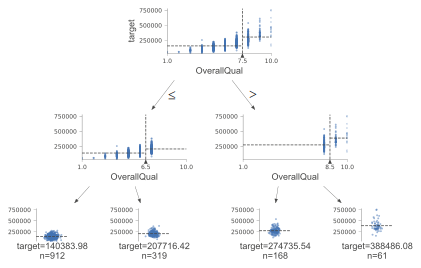

<Figure size 1800x1440 with 0 Axes>

In [4]:
X = df_X.to_numpy()
y = s_y.to_numpy()
print('X shape:', X.shape)
print('y shape:', y.shape)

regr_2 = DecisionTreeRegressor(max_depth=2, random_state=12)
regr_2.fit(X, y)

fig = plt.figure(figsize=(25, 20))
# tree.plot_tree(regr_2, feature_names=df_X.columns.to_list(), filled=True)
# plt.savefig('images/depth_2.png')

viz = dtreeviz(regr_2, X, y,
                target_name="target",
                feature_names=df_X.columns.to_list())
viz
# viz.save('depth_2_viz.svg')
# viz.view()

X shape: (1460, 193)
y shape: (1460,)


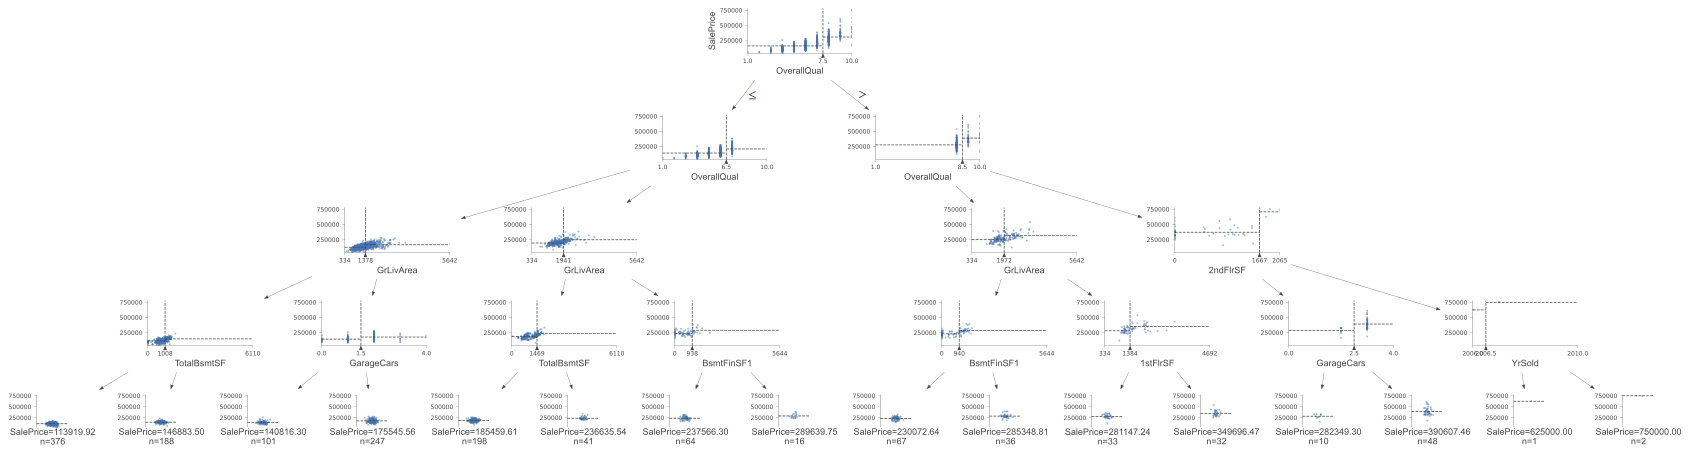

In [6]:
X = df_X.to_numpy()
y = s_y.to_numpy()
print('X shape:', X.shape)
print('y shape:', y.shape)

regr_4 = DecisionTreeRegressor(max_depth=4, random_state=12)
regr_4.fit(X, y)

viz = dtreeviz(regr_4, X, y,
                target_name="SalePrice",
                feature_names=df_X.columns.to_list())
# viz.save('depth_4_viz.svg')
viz

X shape: (1460, 192)
y shape: (1460,)


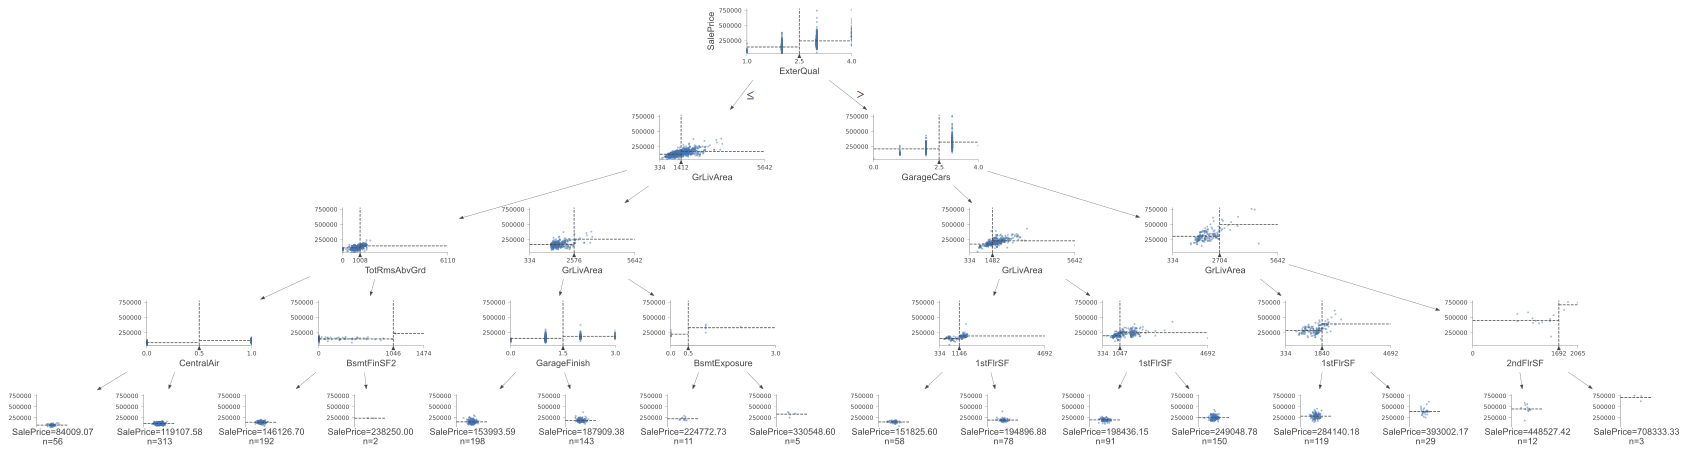

In [7]:
X = df_X[no_overallQual_features].to_numpy()
y = s_y.to_numpy()
print('X shape:', X.shape)
print('y shape:', y.shape)

regr_4 = DecisionTreeRegressor(max_depth=4, random_state=12)
regr_4.fit(X, y)

viz = dtreeviz(regr_4, X, y,
                target_name="SalePrice",
                feature_names=df_X.columns.to_list())
# viz.save('depth_4_viz.svg')
viz

X shape: (1460, 192)
y shape: (1460,)


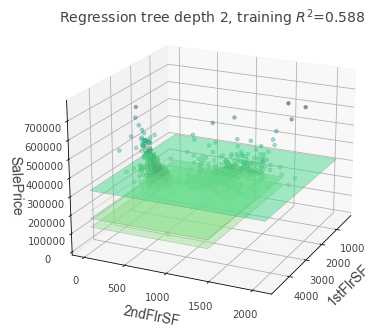

In [32]:
from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import *

X = df_X[no_overallQual_features].to_numpy()
y = df['SalePrice'].to_numpy()
print('X shape:', X.shape)
print('y shape:', y.shape)

regr = DecisionTreeRegressor(max_depth=2, random_state=12)
regr.fit(X, y)

figsize = (6,5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(regr,
                      X, y,
                      feature_names=['1stFlrSF', '2ndFlrSF'],
                      target_name='SalePrice',
                      fontsize=14,
                      elev=20,
                      azim=25,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.savefig('images/1-2-flr-target-space.png')
plt.show()

None


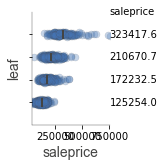

In [104]:
from dtreeviz.trees import *
features_reg = df_X_no_overallQual.columns.to_list()
target_reg = 'SalePrice'
viz_leaf_target(regr_2_noq, df[features_reg], df[target_reg], features_reg, target_reg)
print(l)